<a href="https://colab.research.google.com/github/guthi1/mooc-exercises/blob/daffy-project/project/solution/dev/dataset_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import contextlib
@contextlib.contextmanager
def directory(name):
  ret = os.getcwd()
  os.chdir(name)
  yield None
  os.chdir(ret)

import subprocess
def run(input, exception_on_failure=False):
  try:
    program_output = subprocess.check_output(f"{input}", shell=True, universal_newlines=True, stderr=subprocess.STDOUT)
  except Exception as e:
    if exception_on_failure:
      raise e
    program_output = e.output

    return program_output

def runp(input, exception_on_failure=False):
    print(input)
    print(run(input, exception_on_failure))

@contextlib.contextmanager
def makedirs(name):
    try:
        os.makedirs(name)
    except:
        pass
    yield None

@contextlib.contextmanager
def directory(name):
    ret = os.getcwd()
    os.chdir(name)
    yield None
    os.chdir(ret)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
runp("cp -r /content/drive/MyDrive/data /content/data")

cp -r /content/drive/MyDrive/data /content/data
None


In [3]:
runp("cp -r /content/drive/MyDrive/file.zip /content/data.zip")

cp -r /content/drive/MyDrive/file.zip /content/data
None


In [4]:
runp("unzip -q /content/data.zip")

unzip -q /content/data.zip
None


In [5]:
runp("mv /content/content/data /content/data")

mv /content/content/data /content/data
None


In [114]:
img_ori = cv2.imread('/content/data/dt_sim_voc_train/JPEGImages/2069.jpg')


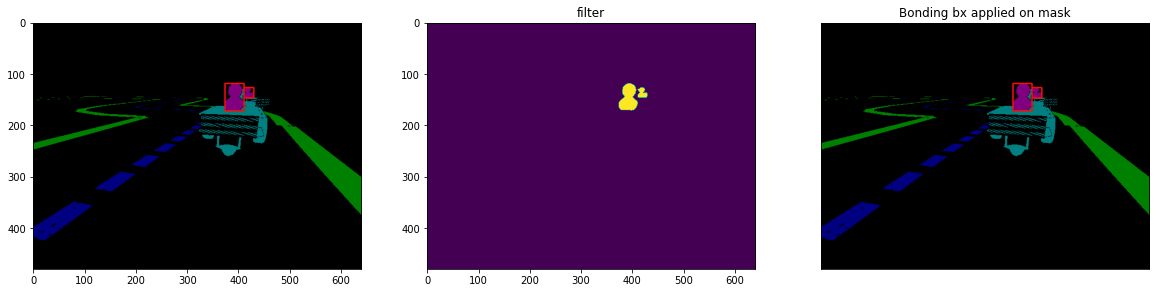

In [115]:
from matplotlib import pyplot as plt
import numpy as np 

imgbgr = cv2.imread('/content/data/dt_sim_voc_train/SegmentationClassPNG/2069.png')

# Find duckie
yellow_lower_hsv = np.array([15, 0, 100])
yellow_upper_hsv = np.array([255, 255, 255]) 
mask_yellow = cv2.inRange(imgbgr, yellow_lower_hsv, yellow_upper_hsv)

contours, hierarchy = cv2.findContours(mask_yellow, 1, 2)
result = imgbgr

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    result = cv2.rectangle(result, (x,y), (x+w,y+h), (255,10,10), 2)
    img_ori = cv2.rectangle(img_ori, (x,y), (x+w,y+h), (255,40,10), 2)


fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(imgbgr)

ax3 = fig.add_subplot(1,3,2)
ax3.imshow(mask_yellow)
ax3.set_title('filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(result)
ax3.set_title('Bonding bx applied on mask'), ax3.set_xticks([]), ax3.set_yticks([]);

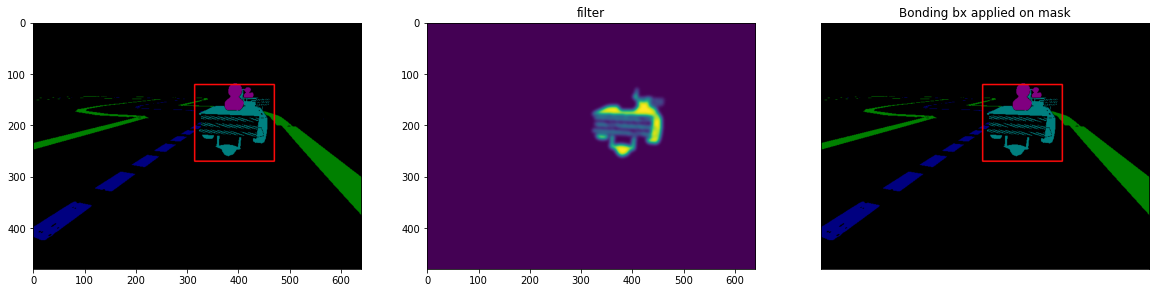

In [116]:
imgbgr = cv2.imread('/content/data/dt_sim_voc_train/SegmentationClassPNG/2069.png')


# Find robot
yellow_lower_hsv = np.array([0, 125, 125])
yellow_upper_hsv = np.array([1, 130, 130]) 
mask_yellow = cv2.inRange(imgbgr, yellow_lower_hsv, yellow_upper_hsv)
# Remove flikering from the syntetic images
sigma = 3.5 # CHANGE ME
mask_yellow = cv2.GaussianBlur(mask_yellow,(0,0), sigma)


contours, hierarchy = cv2.findContours(mask_yellow, 1, 2)
result = imgbgr

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    # Remove noise
    area = ((x+w)-(x-w)) * ((y+h)-(y-h))
    if area > 2000:
        result = cv2.rectangle(result, (x,y), (x+w,y+h), (255,10,10), 2)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(imgbgr)

ax3 = fig.add_subplot(1,3,2)
ax3.imshow(mask_yellow)
ax3.set_title('filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(result)
ax3.set_title('Bonding bx applied on mask'), ax3.set_xticks([]), ax3.set_yticks([]);

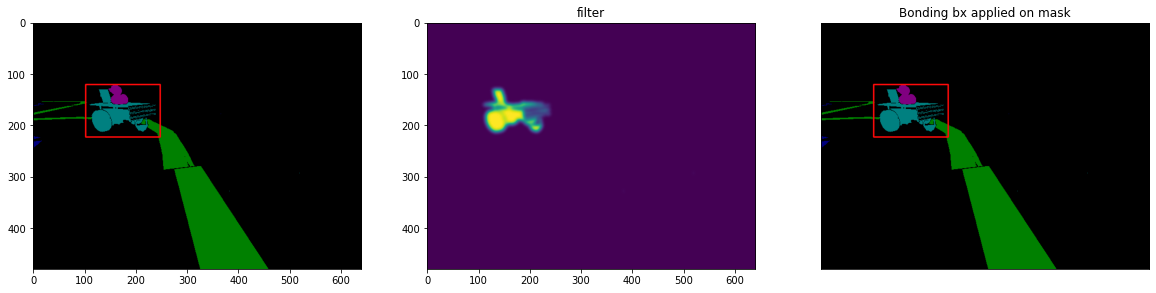

In [117]:
imgbgr = cv2.imread('/content/data/dt_sim_voc_val/SegmentationClassPNG/1866.png')

# Find robot
yellow_lower_hsv = np.array([0, 125, 125])
yellow_upper_hsv = np.array([1, 130, 130]) 
mask_yellow = cv2.inRange(imgbgr, yellow_lower_hsv, yellow_upper_hsv)
# Remove flikering from the syntetic images
sigma = 3.5 # CHANGE ME
mask_yellow = cv2.GaussianBlur(mask_yellow,(0,0), sigma)


contours, hierarchy = cv2.findContours(mask_yellow, 1, 2)
result = imgbgr

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    # Remove noise
    area = ((x+w)-(x-w)) * ((y+h)-(y-h))
    if area > 2000:
        result = cv2.rectangle(result, (x,y), (x+w,y+h), (255,10,10), 2)
        img_ori = cv2.rectangle(img_ori, (x,y), (x+w,y+h), (255,40,10), 2)


fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(imgbgr)

ax3 = fig.add_subplot(1,3,2)
ax3.imshow(mask_yellow)
ax3.set_title('filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(result)
ax3.set_title('Bonding bx applied on mask'), ax3.set_xticks([]), ax3.set_yticks([]);

In [ ]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ori)

## Pipeline

In [118]:
runp(f'rm -rf /content/data/dt_real_voc_test/labels  ')
runp(f'rm -rf /content/data/dt_real_voc_train/labels ')
runp(f'rm -rf /content/data/dt_real_voc_val/labels   ')
runp(f'rm -rf /content/data/dt_sim_voc_train/labels  ')
runp(f'rm -rf /content/data/dt_sim_voc_test/labels    ')
runp(f'rm -rf /content/data/dt_sim_voc_val/labels    ')


runp(f'mkdir /content/data/dt_real_voc_test/labels  ')
runp(f'mkdir /content/data/dt_real_voc_train/labels ')
runp(f'mkdir /content/data/dt_real_voc_val/labels   ')
runp(f'mkdir /content/data/dt_sim_voc_train/labels  ')
runp(f'mkdir /content/data/dt_sim_voc_test/labels    ')
runp(f'mkdir /content/data/dt_sim_voc_val/labels    ')


rm -rf /content/data/dt_real_voc_test/labels  
None
rm -rf /content/data/dt_real_voc_train/labels 
None
rm -rf /content/data/dt_real_voc_val/labels   
None
rm -rf /content/data/dt_sim_voc_train/labels  
None
rm -rf /content/data/dt_sim_voc_test/labels    
None
rm -rf /content/data/dt_sim_voc_val/labels    
None
mkdir /content/data/dt_real_voc_test/labels  
None
mkdir /content/data/dt_real_voc_train/labels 
None
mkdir /content/data/dt_real_voc_val/labels   
None
mkdir /content/data/dt_sim_voc_train/labels  
None
mkdir /content/data/dt_sim_voc_test/labels    
None
mkdir /content/data/dt_sim_voc_val/labels    
None


In [119]:
def extract_label(segmentation_folder, output_folder):

    for filename in os.listdir(segmentation_folder):
        f = os.path.join(segmentation_folder, filename)
        if os.path.isfile(f):
            # print(f'{segmentation_folder}/{filename}')

            imgbgr = cv2.imread(f'{segmentation_folder}/{filename}')

            x_shape, y_shape, _ = imgbgr.shape

            # Find duckie
            filter_lower = np.array([15, 0, 100])
            filter_upper = np.array([255, 255, 255]) 
            mask = cv2.inRange(imgbgr, filter_lower, filter_upper)
            contours, hierarchy = cv2.findContours(mask, 1, 2)
            observation = list()
            for cnt in contours:
                x,y,w,h = cv2.boundingRect(cnt)
                # Remove noise
                area = ((x+w)-(x-w)) * ((y+h)-(y-h))
                observation.append([0, (x + w/2)/x_shape, (y+h/2)/y_shape, w/x_shape, h/y_shape])


            # Find robot
            filter_lower = np.array([0, 100, 100])
            filter_upper = np.array([255, 255, 255]) 
            mask = cv2.inRange(imgbgr, filter_lower, filter_upper)
            if "sim" in segmentation_folder:
                # Remove flikering from the syntetic images
                sigma = 3.8 # CHANGE ME
                mask = cv2.GaussianBlur(mask,(0,0), sigma)
            contours, hierarchy = cv2.findContours(mask, 1, 2)
            for cnt in contours:
                x,y,w,h = cv2.boundingRect(cnt)
                # Remove noise
                area = ((x+w)-(x-w)) * ((y+h)-(y-h))

                if area < 1500 and "sim" in segmentation_folder:
                    continue
                observation.append([1, (x + w/2)/x_shape, (y+h/2)/y_shape, w/x_shape, h/y_shape])

            out = []
            for obs in observation:
                o = ""
                for element in obs:
                    o += str(round(element, 4)) + " "
                o += "\n"
                out.append(o)

            # writing to file
            file1 = open(f'{output_folder}/{filename.strip(".pgn")}.txt', 'w')
            file1.writelines(out)
            file1.close()
    

input_folder = '/content/data/dt_real_voc_test/SegmentationClassPNG'
output_folder = '/content/data/dt_real_voc_test/labels'

extract_label(input_folder, output_folder)

In [120]:
input_folder = '/content/data/dt_real_voc_train/SegmentationClassPNG'
output_folder = '/content/data/dt_real_voc_train/labels'
extract_label(input_folder, output_folder)

input_folder = '/content/data/dt_real_voc_val/SegmentationClassPNG'
output_folder = '/content/data/dt_real_voc_val/labels'
extract_label(input_folder, output_folder)

input_folder = '/content/data/dt_sim_voc_test/SegmentationClassPNG'
output_folder = '/content/data/dt_sim_voc_test/labels'
extract_label(input_folder, output_folder)

input_folder = '/content/data/dt_sim_voc_train/SegmentationClassPNG'
output_folder = '/content/data/dt_sim_voc_train/labels'
extract_label(input_folder, output_folder)

input_folder = '/content/data/dt_sim_voc_val/SegmentationClassPNG'
output_folder = '/content/data/dt_sim_voc_val/labels'
extract_label(input_folder, output_folder)


### Verif dataset format

In [121]:
IMAGE_SIZE = 416

scale_x: 0.65
scale_y: 0.8666666666666667


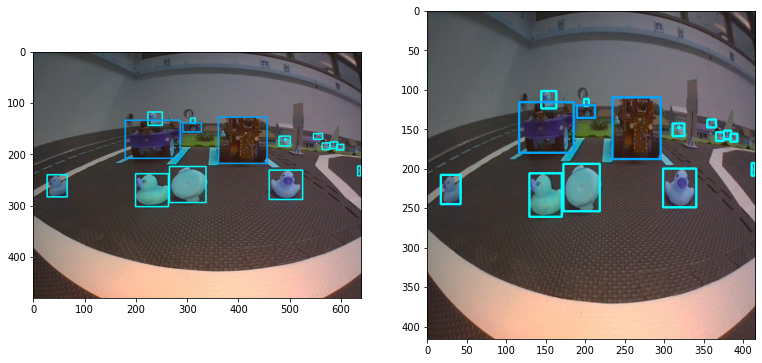

In [122]:
yolo_data_img_path = '/content/data/dt_real_voc_train/JPEGImages/left0000.jpg'
yolo_data_txt_path = '/content/data/dt_real_voc_train/labels/left0000.txt'
colors = {0: (0, 255, 255), 1: (0, 165, 255), 2: (0, 250, 0), 3: (0, 0, 255)}


# removing the new line characters
with open(yolo_data_txt_path) as f:
    objs = [line.rstrip().split(' ') for line in f]

img_ori = cv2.imread(yolo_data_img_path)
x_shape, y_shape, channel = img_ori.shape

# Resize image
scale_y, scale_x = IMAGE_SIZE/x_shape, IMAGE_SIZE/y_shape
print(f"scale_x: {scale_x}")
print(f"scale_y: {scale_y}")
img = cv2.resize(img_ori, (IMAGE_SIZE,IMAGE_SIZE))

for obj in objs:
    o, x, y, w, h = obj
    pt1 = np.array([int(x_shape * (float(x) + float(w)/2)), int(y_shape * (float(y) + float(h)/2))])
    pt2 = np.array([int(x_shape * (float(x) - float(w)/2)), int(y_shape * (float(y) - float(h)/2))])
    img_ori = cv2.rectangle(img_ori, pt1, pt2, colors[int(o)], 2)

    pt1_scaled = np.array([int(pt1[0] * scale_x), int(pt1[1] * scale_y)])
    pt2_scaled = np.array([int(pt2[0] * scale_x), int(pt2[1] * scale_y)])

    img = cv2.rectangle(img, pt1_scaled, pt2_scaled, colors[int(o)], 2)



fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ori)

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img)

scale_x: 0.65
scale_y: 0.8666666666666667


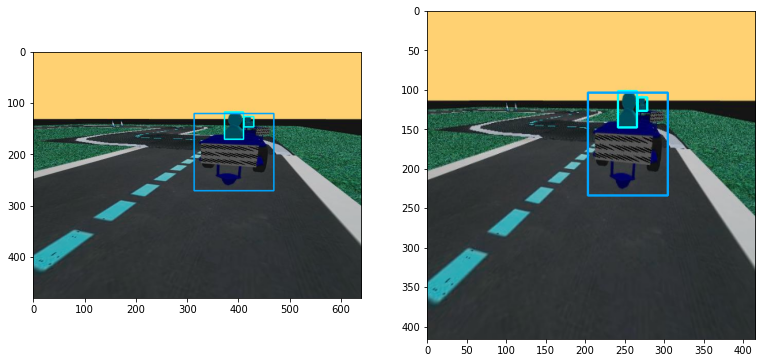

In [123]:
yolo_data_img_path = '/content/data/dt_sim_voc_train/JPEGImages/2069.jpg'
yolo_data_txt_path = '/content/data/dt_sim_voc_train/labels/2069.txt'
colors = {0: (0, 255, 255), 1: (0, 165, 255), 2: (0, 250, 0), 3: (0, 0, 255)}


# removing the new line characters
with open(yolo_data_txt_path) as f:
    objs = [line.rstrip().split(' ') for line in f]

img_ori = cv2.imread(yolo_data_img_path)
x_shape, y_shape, channel = img_ori.shape

# Resize image
scale_y, scale_x = IMAGE_SIZE/x_shape, IMAGE_SIZE/y_shape
print(f"scale_x: {scale_x}")
print(f"scale_y: {scale_y}")
img = cv2.resize(img_ori, (IMAGE_SIZE,IMAGE_SIZE))

for obj in objs:
    o, x, y, w, h = obj
    pt1 = np.array([int(x_shape * (float(x) + float(w)/2)), int(y_shape * (float(y) + float(h)/2))])
    pt2 = np.array([int(x_shape * (float(x) - float(w)/2)), int(y_shape * (float(y) - float(h)/2))])
    img_ori = cv2.rectangle(img_ori, pt1, pt2, colors[int(o)], 2)

    pt1_scaled = np.array([int(pt1[0] * scale_x), int(pt1[1] * scale_y)])
    pt2_scaled = np.array([int(pt2[0] * scale_x), int(pt2[1] * scale_y)])

    img = cv2.rectangle(img, pt1_scaled, pt2_scaled, colors[int(o)], 2)



fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ori)

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img)

In [ ]:
yolo_data_img_path = "/content/drive/MyDrive/dt_dataset/train/images/real_1.jpg"
yolo_data_txt_path = "/content/drive/MyDrive/dt_dataset/train/labels/real_1.txt"
colors = {0: (0, 255, 255), 1: (0, 165, 255), 2: (0, 250, 0), 3: (0, 0, 255)}


# removing the new line characters
with open(yolo_data_txt_path) as f:
    objs = [line.rstrip().split(' ') for line in f]

img_ori = cv2.imread(yolo_data_img_path)
x_shape, y_shape, channel = img_ori.shape

for obj in objs:
    o, x, y, w, h = obj

    pt1 = np.array([int(x_shape * (float(x) + float(w)/2)), int(y_shape * (float(y) + float(h)/2))])
    pt2 = np.array([int(x_shape * (float(x) - float(w)/2)), int(y_shape * (float(y) - float(h)/2))])
    img_ori = cv2.rectangle(img_ori, pt1, pt2, colors[int(o)], 2)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ori)

## Move data to drive

Download as a zip

In [ ]:
!zip -r /content/data.zip /content/data

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save to drive

In [ ]:
runp("rm -rf /content/drive/MyDrive/data")


rm -rf /content/drive/MyDrive/data
None


In [125]:
runp("mv /content/data.zip /content/drive/MyDrive/data.zip")

mv /content/data.zip /content/drive/MyDrive/data.zip
None


Copy only the labels

In [ ]:
runp(f'rm -rf /content/drive/MyDrive/data/dt_real_voc_test/JPEGImages/labels  ')
runp(f'rm -rf /content/drive/MyDrive/data/dt_real_voc_train/JPEGImages/labels ')
runp(f'rm -rf /content/drive/MyDrive/data/dt_real_voc_val/JPEGImages/labels   ')
runp(f'rm -rf /content/drive/MyDrive/data/dt_sim_voc_train/JPEGImages/labels  ')
runp(f'rm -rf /content/drive/MyDrive/data/dt_sim_voc_test/JPEGImages/labels    ')
runp(f'rm -rf /content/drive/MyDrive/data/dt_sim_voc_val/JPEGImages/labels    ')
